<a href="https://colab.research.google.com/github/ShaliniAnandaPhD/EDM-Genetic-Circuits/blob/main/Genetic_toggle_switch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why Toggle Switch:**

1. Predicting Protein Structures Involved in Toggle Switches
If the toggle switch involves specific regulatory proteins, ESMFold can be used to predict their structures. Understanding these structures can provide insights into how these proteins interact with DNA or other proteins, which is crucial in the functioning of the toggle switch.

2. Modeling the Impact of Mutations
You could use ESMFold to predict how mutations in the regulatory proteins affect their structure, and hence, the functionality of the genetic toggle switch. This can be a powerful tool in designing and optimizing synthetic biological circuits.

**WHY JAX?**


JAX uses XLA (Accelerated Linear Algebra) to compile and run your NumPy
programs on GPUs and TPUs. This is particularly beneficial for computationally intensive tasks like simulating genetic circuits or processing large datasets in EDM.


Just-In-Time Compilation: JAX's JIT compilation can significantly speed up the execution of numerical simulations and data processing, a critical factor in large-scale, long-term projects.


Gradient Computation: JAX's autodiff capabilities are invaluable for optimization problems, such as parameter tuning in genetic toggle switches or in machine learning models applied to EDM.

In [23]:
!pip install jax jaxlib


In [ ]:
!pip install matplotlib

Task 1:

---
Installation of Packages: The code starts by installing jax and jaxlib, which are essential libraries for high-performance numerical computations, particularly useful for tasks involving complex mathematical operations like differential equations.

---
Setting Up Dependencies: The matplotlib library is installed for plotting and visualizing data. It's a popular Python library used for creating static, interactive, and animated visualizations.

---
Defining the Toggle Switch Model: The toggle_switch function defines the differential equations representing a basic genetic toggle switch. This switch involves two proteins, U and V, whose concentrations over time are governed by these equations. Parameters like alpha1, alpha2, beta, and gamma control the dynamics of the switch.

---
Simulating the Switch: The simulation is set up with initial concentrations of the proteins (y0) and a time range (t). The odeint function from scipy.integrate is used to solve the differential equations over the specified time range.

---
Plotting the Results: The concentrations of proteins U and V are plotted against time using matplotlib to visualize how they change and interact over the specified period.
This task essentially creates a foundation for understanding how a genetic toggle switch behaves under a set of given parameters, providing a visual representation of its dynamics.

In [24]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
def toggle_switch(y, t, alpha1, alpha2, beta, gamma):
    u, v = y
    du_dt = alpha1 / (1 + v**beta) - u
    dv_dt = alpha2 / (1 + u**gamma) - v
    return [du_dt, dv_dt]


In [ ]:
# Parameters
alpha1, alpha2, beta, gamma = 2.0, 2.0, 2.0, 2.0
y0 = [0.1, 0.1]
t = jnp.linspace(0, 50, 200)  # Time from 0 to 50 in 200 steps

# Solve the differential equations
solution = odeint(toggle_switch, y0, t, args=(alpha1, alpha2, beta, gamma))

# Extract solutions
u, v = solution.T


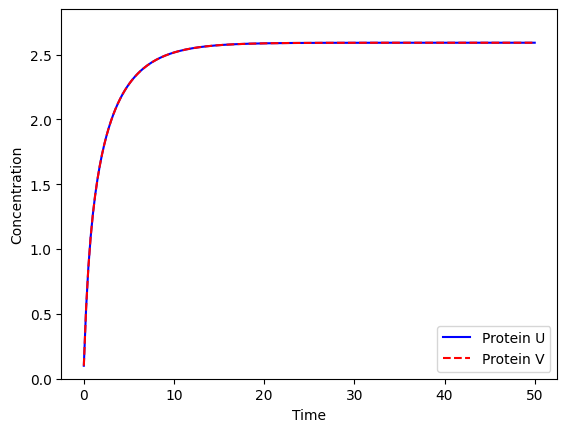

In [26]:
plt.plot(t, u, label='Protein U', color='blue')  # Plotting Protein U in blue
plt.plot(t, v, label='Protein V', color='red', linestyle='--')  # Plotting Protein V in red dashed line

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.ylim([0, max(max(u), max(v)) * 1.1])  # Adjust y-axis limits
plt.show()



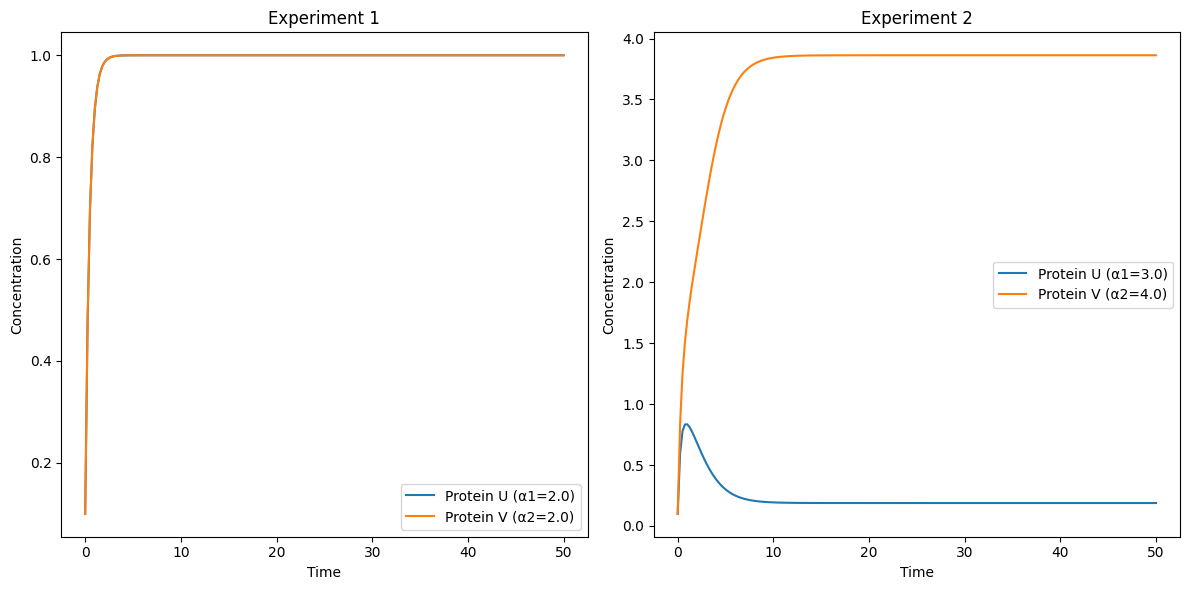

In [ ]:
def experiment_parameters(alpha1_range, alpha2_range):
    t = jnp.linspace(0, 50, 200)  # Time range
    y0 = [0.1, 0.1]  # Initial conditions

    plt.figure(figsize=(12, 6))

    for i, (alpha1, alpha2) in enumerate(zip(alpha1_range, alpha2_range)):
        solution = odeint(toggle_switch, y0, t, args=(alpha1, alpha2, 2.0, 2.0))
        u, v = solution.T
        plt.subplot(1, len(alpha1_range), i + 1)
        plt.plot(t, u, label=f'Protein U (α1={alpha1})')
        plt.plot(t, v, label=f'Protein V (α2={alpha2})')
        plt.xlabel('Time')
        plt.ylabel('Concentration')
        plt.title(f'Experiment {i+1}')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
experiment_parameters([2.0, 3.0], [2.0, 4.0])


**Advanced Model Definition**: A more complex model of the genetic toggle switch (complex_toggle_switch) is defined, which includes an additional parameter delta for degradation.

---
**JAX's ODE Solver and JIT Compilation**: Unlike the basic model, this task utilizes JAX's own ODE solver (jax.experimental.ode.odeint) which is compatible with JAX's JIT compilation. The run_simulation function is defined to use this solver and is then JIT-compiled using jax.jit. This approach can significantly improve the performance of the simulation, especially beneficial for more complex or larger-scale models.

---
**Experimentation Function**: The experiment_parameters function allows for running simulations with varying alpha1 and alpha2 values, enabling the exploration of how different parameter values affect the toggle switch's behavior.

---
**Visualization Enhancements**: The plotting is enhanced to accommodate multiple subplots for different parameter sets, providing a comparative view of how varying parameters influence the dynamics of the system.

---
This task extends the basic model by adding complexity and exploring how varying certain parameters can alter the behavior of the genetic toggle switch. The use of JIT compilation demonstrates how performance optimizations can be applied to more computationally demanding simulations.

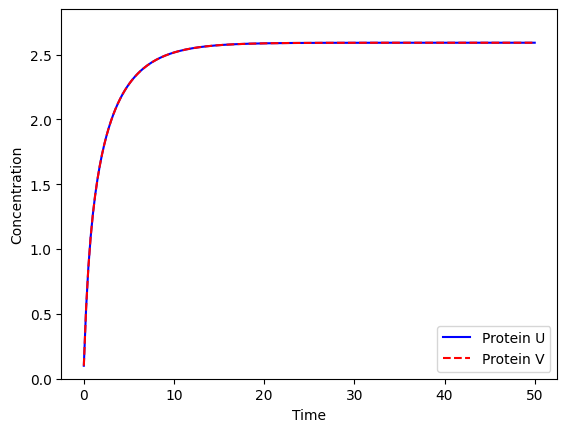

In [25]:
import jax.numpy as jnp
from jax import jit
from jax.experimental.ode import odeint  # Import JAX's ODE solver
import matplotlib.pyplot as plt

# Defining the more complex toggle switch model with a degradation term
def complex_toggle_switch(y, t, alpha1, alpha2, beta, gamma, delta):
    u, v = y
    du_dt = alpha1 / (1 + v**beta) - delta * u
    dv_dt = alpha2 / (1 + u**gamma) - delta * v
    return jnp.array([du_dt, dv_dt])  # Ensure the return type is a JAX array

# Define the ODE solver function
def run_simulation(y0, start, stop, num_points, alpha1, alpha2, beta, gamma, delta):
    t = jnp.linspace(start, stop, num_points)
    return odeint(complex_toggle_switch, jnp.array(y0), t, alpha1, alpha2, beta, gamma, delta)

# Apply JIT compilation to the function with num_points as a static argument
run_simulation_jit = jit(run_simulation, static_argnums=3)

# Running JIT-compiled simulation with static values
y0 = [0.1, 0.1]
start, stop, num_points = 0, 50, 200
alpha1, alpha2, beta, gamma, delta = 2.0, 2.0, 2.0, 2.0, 0.1
jit_solution = run_simulation_jit(y0, start, stop, num_points, alpha1, alpha2, beta, gamma, delta)

# Extract solutions for plotting
u, v = jit_solution.T

# Plotting the results
plt.plot(t, u, label='Protein U', color='blue')  # Plotting Protein U in blue
plt.plot(t, v, label='Protein V', color='red', linestyle='--')  # Plotting Protein V in red dashed line

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.ylim([0, max(max(u), max(v)) * 1.1])  # Adjust y-axis limits
plt.show()


